In [81]:
!pip install factor-analyzer

  Using cached factor_analyzer-0.5.1-py2.py3-none-any.whl



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
import sqlite3
import pandas as pd
import factor_analyzer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print("Hello World")

Hello World


# 한글 폰트 설정

In [76]:
import platform

# 1. 운영체제(OS)에 따른 폰트 자동 설정
system_name = platform.system()

if system_name == 'Darwin':  # Mac (맥북)
    plt.rc('font', family='AppleGothic')
elif system_name == 'Windows':  # Windows (윈도우)
    plt.rc('font', family='Malgun Gothic')
else:  # Linux (코랩 등)
    # 리눅스는 폰트가 설치되어 있어야 함 (나눔고딕 등)
    plt.rc('font', family='NanumGothic')

# 2. 마이너스(-) 기호가 깨지는 현상 방지 (매우 중요!)
plt.rcParams['axes.unicode_minus'] = False

# 3. (선택) 고해상도 모니터에서 그래프 선명하게 보기 (Retina 설정)
%config InlineBackend.figure_format = 'retina'

print(f"{system_name} 환경에서 폰트 설정 완료!")

Windows 환경에서 폰트 설정 완료!


# 데이터 로드

In [4]:
conn = sqlite3.connect('baseball.db')

In [130]:
hitter_df = pd.read_sql_query("""
SELECT
    *
FROM
    player
RIGHT JOIN
    hitter
ON
    hitter.player_id = player.player_id
WHERE
    hitter.타석 >= 446
""", conn)

hitter_df.head()

,player_id,uniform_number,name,team,position,birth_day,height,weight,school,player_id,...,삼진,병살타,장타율,출루율,실책,도루성공률,멀티히트,출루율+장타율,득점권타율,대타타율
0,50167,2,이주형,키움,외야수,2001-04-02,181,80,송수초(해운대리틀)-센텀중-경남고-LG,50167,...,115,7,0.368,0.337,1,93.8,28,0.705,0.257,0.222
1,50854,54,최지훈,SSG,외야수,1997-07-23,178,82,광주수창초-무등중-광주제일고-동국대-SK,50854,...,87,2,0.371,0.342,5,80.0,37,0.713,0.280,0.286
2,51344,44,김휘집,NC,내야수,2002-01-01,180,92,양목초(히어로즈리틀)-대치중-신일고-키움,51344,...,89,9,0.420,0.349,19,83.3,29,0.769,0.242,0.333
3,51868,18,고명준,SSG,내야수,2002-07-08,185,94,서원초-세광중-세광고-SK,51868,...,99,12,0.433,0.306,3,100.0,43,0.739,0.235,0.000
4,51907,7,김주원,NC,내야수,2002-07-30,185,83,삼일초(군포시리틀)-안산중앙중-유신고,51907,...,111,8,0.451,0.379,29,80.0,40,0.830,0.306,0.333


In [131]:
hitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player_id       43 non-null     int64  
 1   uniform_number  43 non-null     int64  
 2   name            43 non-null     object 
 3   team            43 non-null     object 
 4   position        43 non-null     object 
 5   birth_day       43 non-null     object 
 6   height          43 non-null     int64  
 7   weight          43 non-null     int64  
 8   school          43 non-null     object 
 9   player_id       43 non-null     int64  
 10  타율              43 non-null     float64
 11  경기              43 non-null     int64  
 12  타석              43 non-null     int64  
 13  타수              43 non-null     int64  
 14  득점              43 non-null     int64  
 15  안타              43 non-null     int64  
 16  2루타             43 non-null     int64  
 17  3루타             43 non-null     int64

# 주성분 분석 가능 여부 확인

In [132]:
stat, p_value = factor_analyzer.calculate_bartlett_sphericity(hitter_data_df)
p_value

np.float64(0.0)

- Bartlett's Sphericity Test의 pvalue가 0이다
- 주성분 분석 가능하다

# 주성분 분석 진행

In [133]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()

In [134]:
hitter_data_df = hitter_df[["타율", "득점", "안타", "2루타", "3루타", "홈런", "타점", "도루", "도루실패",
                            "희생번트",  "희생플라이",  "볼넷",  "사구",  "삼진",  "병살타",  "장타율",
                            "출루율",  "실책",  "득점권타율",  "대타타율"
                           ]]

hitter_data_df_scaled = scaler.fit_transform(hitter_data_df)
hitter_data_df_scaled

array([[-1.54484153e+00, -8.14630006e-01, -1.08297281e+00,
        -2.64802651e-01, -4.97981881e-01, -3.65663169e-01,
        -1.06866477e+00,  3.41485141e-01, -6.47606648e-01,
        -6.75600487e-02, -1.71019716e+00, -1.05040519e+00,
         3.49717080e+00,  9.41060156e-01, -5.43810167e-01,
        -9.54892044e-01, -8.06689840e-01, -9.88241879e-01,
        -6.77234497e-01, -1.34438538e-01],
       [ 2.57335236e-02, -1.74563573e-01,  6.40166165e-01,
        -1.12960118e+00,  8.13031642e-01, -7.61223326e-01,
        -1.06866477e+00,  1.43855522e+00,  9.74553694e-01,
         1.55907805e-01, -7.91757944e-03, -6.59345251e-01,
        -4.02154929e-01, -1.04176401e-01, -1.67894789e+00,
        -9.13652984e-01, -6.48731447e-01, -3.93914595e-01,
        -2.77839794e-01,  1.35026034e-01],
       [-1.22358754e+00, -2.90939288e-01, -1.08297281e+00,
        -8.41335005e-01, -6.09773731e-02,  2.27677067e-01,
        -6.07461819e-01, -8.04648897e-02, -3.77246591e-01,
        -2.91027902e-01, -1.0

In [135]:
num_components = min(hitter_data_df.shape)
pca = PCA(num_components)
PCA_result = pca.fit_transform(hitter_data_df_scaled)

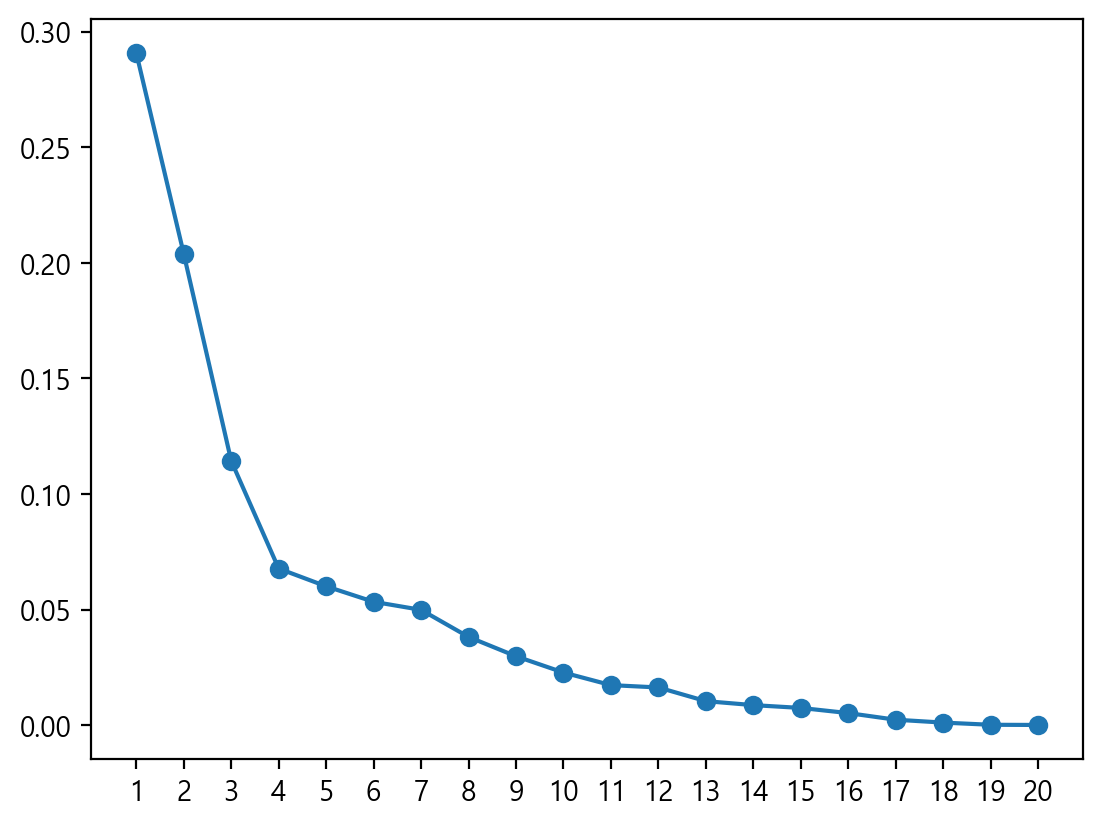

In [136]:
x = np.arange(1, num_components + 1)
y = pca.explained_variance_ratio_
plt.plot(x, y, marker="o")
plt.xticks(x)
plt.show()

In [137]:
corrlation_X_Z0 = []
for i in range(hitter_data_df_scaled.shape[1]):
    corrlation = float(np.corrcoef(PCA_result[:, 0], hitter_data_df_scaled[:, i])[0 ,1])
    corrlation_X_Z0.append(corrlation)


corrlation_X_Z1 = []
for i in range(hitter_data_df_scaled.shape[1]):
    corrlation = float(np.corrcoef(PCA_result[:, 1], hitter_data_df_scaled[:, i])[0 ,1])
    corrlation_X_Z1.append(corrlation)

corrlation_X_Z2 = []
for i in range(hitter_data_df_scaled.shape[1]):
    corrlation = float(np.corrcoef(PCA_result[:, 2], hitter_data_df_scaled[:, i])[0 ,1])
    corrlation_X_Z2.append(corrlation)

corrlation_X_Z3 = []
for i in range(hitter_data_df_scaled.shape[1]):
    corrlation = float(np.corrcoef(PCA_result[:, 3], hitter_data_df_scaled[:, i])[0 ,1])
    corrlation_X_Z3.append(corrlation)

correlation_X_Z0_Z1_Z2_Z3 = pd.DataFrame({
        "Z0_correlation" : corrlation_X_Z0,
        "Z1_correlation" : corrlation_X_Z1,
        "Z2_correlation" : corrlation_X_Z2,
        "Z3_correlation" : corrlation_X_Z3,
    },
    index = hitter_data_df.columns
)

correlation_X_Z0_Z1_Z2_Z3

,Z0_correlation,Z1_correlation,Z2_correlation,Z3_correlation
타율,0.719939,0.453612,-0.414626,-0.106452
득점,0.526512,0.511556,0.560108,0.190257
안타,0.782096,0.351834,-0.102849,0.012525
2루타,0.758776,0.015494,-0.034262,-0.053613
3루타,0.064988,0.767335,0.148506,-0.307177
홈런,0.636729,-0.499807,0.468784,-0.047941
타점,0.894608,-0.281642,0.097322,-0.004804
도루,-0.245156,0.785535,0.270070,0.049919
도루실패,-0.406717,0.762447,0.180861,0.198276
희생번트,-0.487808,0.541864,0.040494,0.395668


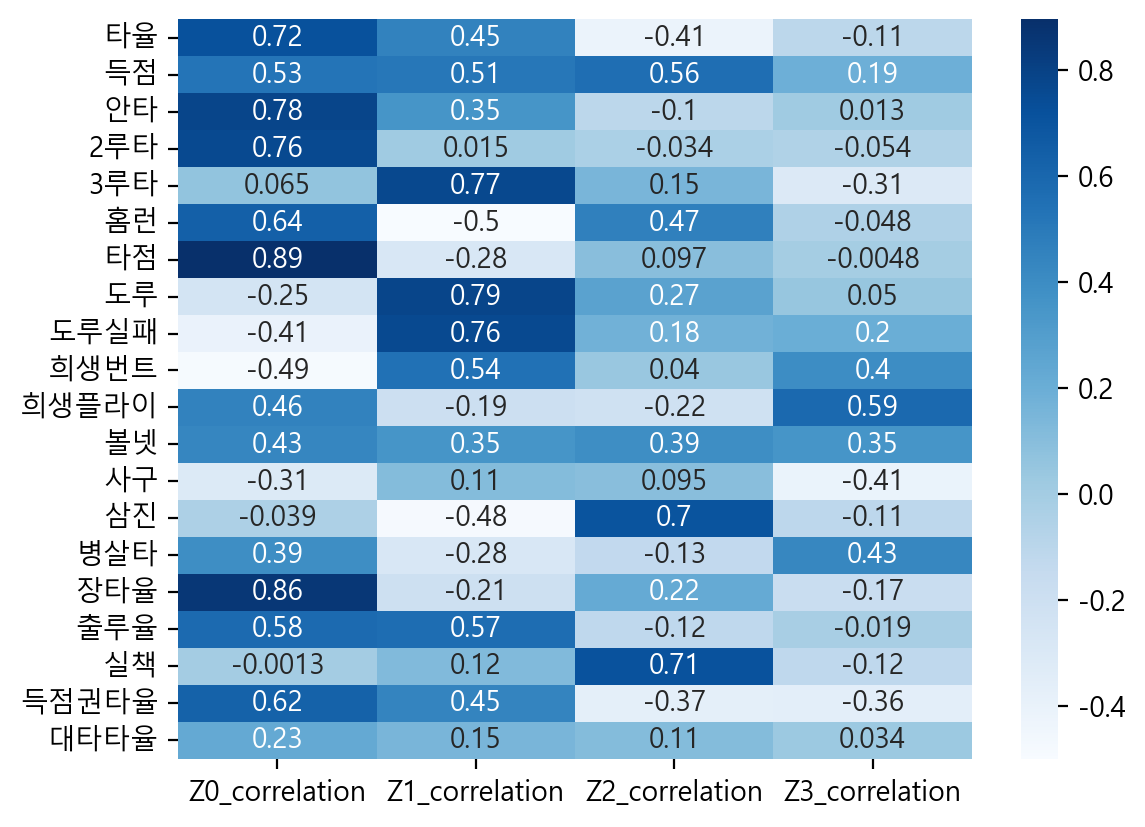

In [138]:
sns.heatmap(correlation_X_Z0_Z1_Z2_Z3, cmap="Blues", annot=True)
plt.show()

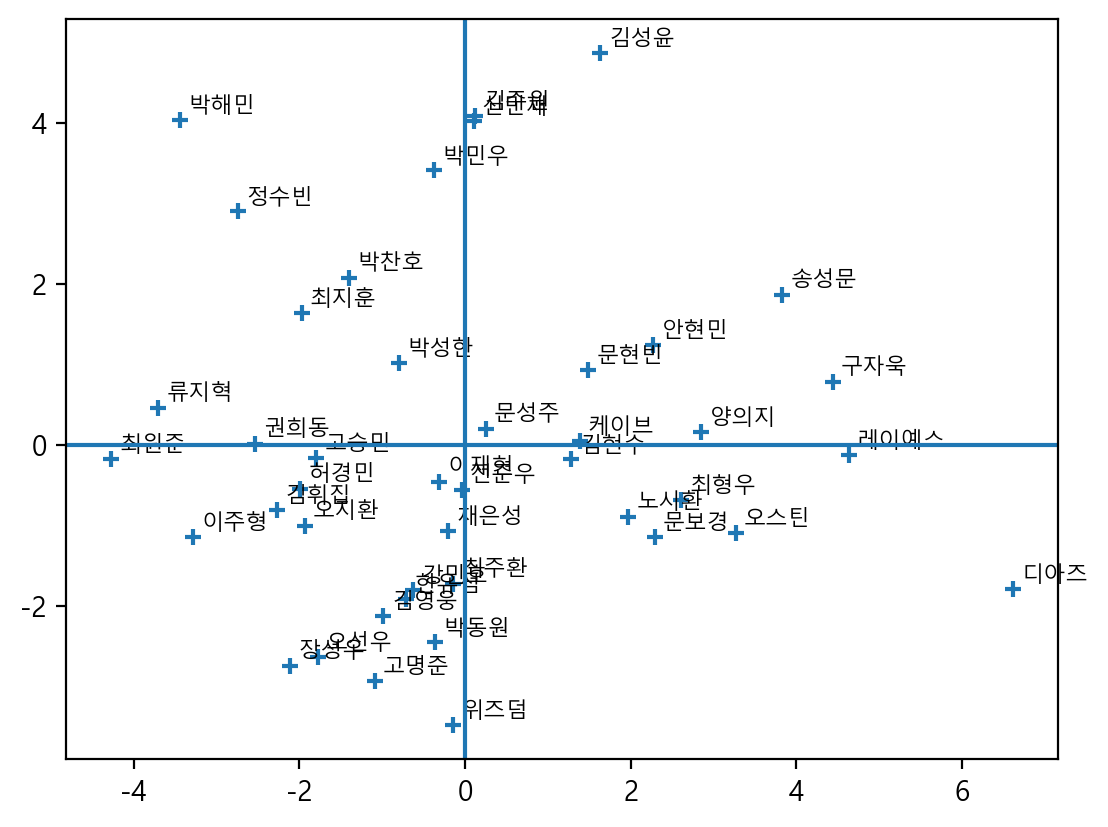

In [139]:
x = PCA_result[:, 0]
y = PCA_result[:, 1]

plt.scatter(x, y, marker="+")

for row in hitter_df.itertuples():
    plt.annotate(row.name, (x[row.Index] + 0.1, y[row.Index] + 0.1), size=8, zorder=1)


plt.axvline(0)
plt.axhline(0)

plt.show()

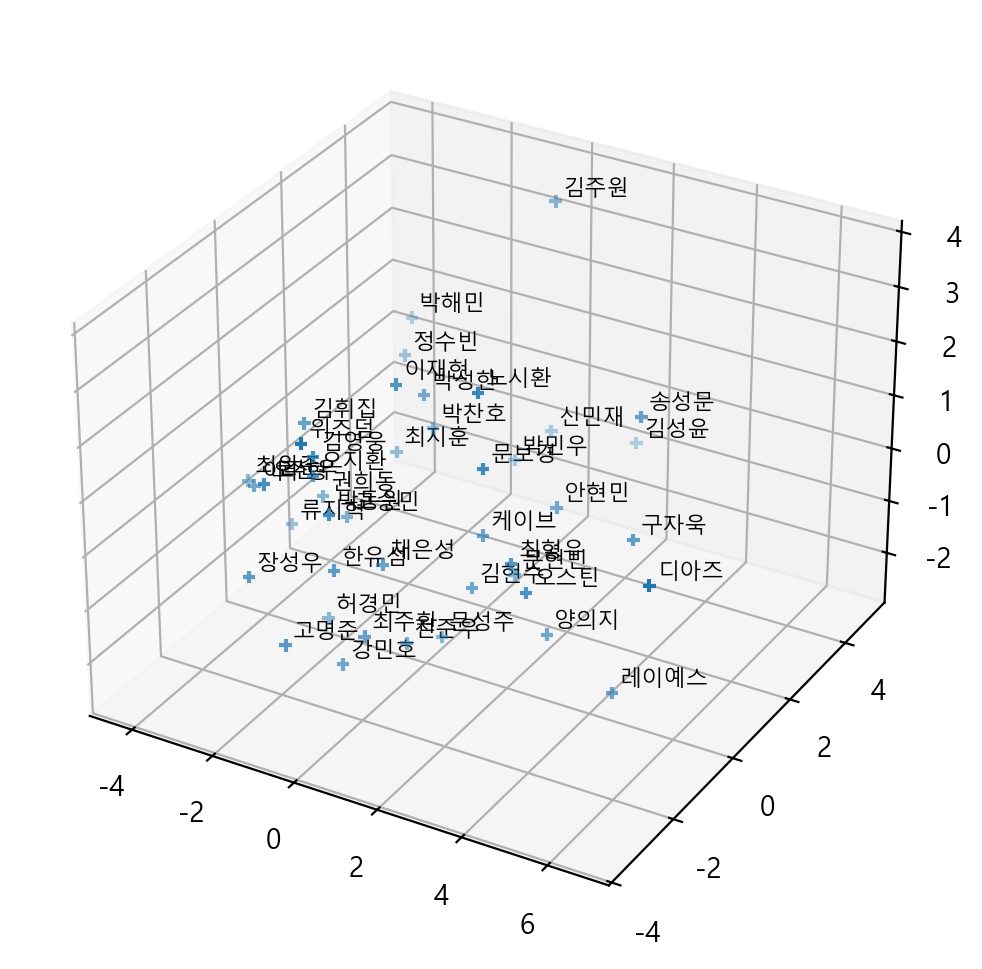

In [141]:
x = PCA_result[:, 0]
y = PCA_result[:, 1]
z = PCA_result[:, 2]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, marker="+")

for row in hitter_df.itertuples():
    ax.text(x[row.Index] + 0.1, y[row.Index] + 0.1, z[row.Index] + 0.1, row.name, size=8, zorder=1)


# plt.axvline(0)
# plt.axhline(0)
# plt.axhline(0)

plt.show()